# Data Analysis Project - Kaggle Obesity Dataset

Welcome!
In this project, we will make and answer some questions, analyzing the data provided by the Kaggle's obesity dataset that can be accessed by clicking in the link below:

[Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)

Importing libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Checking the data

In [2]:
df_obesity = pd.read_csv("obesity_cleaned.csv")
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [3]:
df_obesity['Obesity (%)'].value_counts()

Obesity (%)
No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: count, Length: 16375, dtype: int64

In [4]:
df_obesity.info()
print()
print('Rows, Columns', df_obesity.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB

Rows, Columns (24570, 5)


The dataset has some unnecessary columns, wrong data types, bad data formatting and some rows with no data. Let's fix this!

- Drop the uneccessary column

In [5]:
df_obesity.drop('Unnamed: 0', axis=1, inplace=True)

- Remove rows with no data

In [6]:
df_obesity['Obesity (%)'] = df_obesity['Obesity (%)'].str.split(' ')
df_obesity['Obesity (%)'] = df_obesity['Obesity (%)'].str[0]
df_obesity.loc[df_obesity['Obesity (%)'] == "No", 'Obesity (%)'] = np.nan
df_obesity['Obesity (%)'] = df_obesity['Obesity (%)'].dropna()

- Set the correct data types

In [7]:
df_obesity['Country'] = df_obesity['Country'].astype('string')
df_obesity['Obesity (%)'] = df_obesity['Obesity (%)'].apply(lambda x: float(x))
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))
df_obesity['Sex'] = df_obesity['Sex'].astype('string')
df_obesity


,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5,Male
24566,Zimbabwe,2015,24.8,Female
24567,Zimbabwe,2016,15.5,Both sexes
24568,Zimbabwe,2016,4.7,Male


Now that we've cleaned the dataset, let's answer some questions:

- What is the average percentage of obesity by sex in the world in 2015?

In [8]:
df_obesity_2015 = df_obesity[df_obesity['Year'] == 2015]
pd.to_numeric(df_obesity_2015['Obesity (%)'], errors='coerce')
df_obesity_2015_both = df_obesity_2015[df_obesity_2015['Sex'] == 'Both sexes']['Obesity (%)'].mean()
df_obesity_2015_males = df_obesity_2015[df_obesity_2015['Sex'] == 'Male']['Obesity (%)'].mean()
df_obesity_2015_females = df_obesity_2015[df_obesity_2015['Sex'] == 'Female']['Obesity (%)'].mean()
display(df_obesity_2015_both)
display(df_obesity_2015_males)
display(df_obesity_2015_females)

19.508376963350784

15.98062827225131

22.899476439790575

- Which are the 5 countries with the biggest and lowest index increase rates within the observed period?

In [9]:
df_5_countries = df_obesity
df_5_countries['Obesity (%)'] = pd.to_numeric(df_5_countries['Obesity (%)'], errors='coerce') 
df_5_countries

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5,Male
24566,Zimbabwe,2015,24.8,Female
24567,Zimbabwe,2016,15.5,Both sexes
24568,Zimbabwe,2016,4.7,Male


In [10]:
df_group = df_5_countries.groupby('Country')
df_obesity_min = df_group['Obesity (%)'].min()
df_obesity_max = df_group['Obesity (%)'].max()

df_obesity_stats = pd.DataFrame({
    'Min rates': df_obesity_min,
    'Max rates': df_obesity_max,
}).reset_index()

df_obesity_stats['Rates increase'] = df_obesity_stats['Max rates'] -  df_obesity_stats['Min rates']
df_low_increase = df_obesity_stats.sort_values(by=['Rates increase']).head(5)
df_high_increase = df_obesity_stats.sort_values(by=['Rates increase']).tail(9).dropna()
display(df_low_increase)
display(df_high_increase)

,Country,Min rates,Max rates,Rates increase
191,Viet Nam,0.1,2.6,2.5
86,Japan,0.6,4.8,4.2
139,Republic of Korea,0.3,4.8,4.5
29,Cambodia,0.1,4.8,4.7
156,Singapore,1.5,6.3,4.8


,Country,Min rates,Max rates,Rates increase
90,Kiribati,11.9,50.4,38.5
175,Tonga,13.4,54.5,41.1
126,Niue,13.6,55.1,41.5
148,Samoa,13.1,55.0,41.9
180,Tuvalu,12.4,56.2,43.8


- Which countries have the highest and lowest obesity percentage levels in 2015?

In [11]:
df_obesity_percentage_2015 = df_obesity[(df_obesity['Year'] == 2015)].groupby('Country')
df_obesity_min = df_obesity_percentage_2015['Obesity (%)'].min()
df_obesity_max = df_obesity_percentage_2015['Obesity (%)'].max()

df_obesity_percentage_2015 = pd.DataFrame({
    'Min rates': df_obesity_min,
    'Max rates': df_obesity_max,
}).reset_index()

display(df_obesity_percentage_2015[['Country', 'Min rates']].min())
display(df_obesity_percentage_2015[['Country', 'Max rates']].max())

C:\Users\caio.guedes\AppData\Local\Temp\ipykernel_15984\1672739640.py:10: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  display(df_obesity_percentage_2015[['Country', 'Min rates']].min())


Country      Afghanistan
Min rates            1.5
dtype: object

C:\Users\caio.guedes\AppData\Local\Temp\ipykernel_15984\1672739640.py:11: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  display(df_obesity_percentage_2015[['Country', 'Max rates']].max())


Country      Zimbabwe
Max rates        63.1
dtype: object

- What is the average percentage difference in obesity between sexes over the years for Brazil?

In [12]:
df_obesity_brazil = df_obesity[(df_obesity['Country'] == 'Brazil') & (df_obesity['Sex'] != 'Both sexes')]
df_males = df_obesity_brazil[df_obesity_brazil['Sex'] == 'Male']
df_females = df_obesity_brazil[df_obesity_brazil['Sex'] == 'Female']

df_brazil = pd.merge(df_males, df_females, how='inner', on='Year')
df_brazil.drop('Country_y', axis=1)
df_brazil = df_brazil[['Country_x', 'Year', 'Sex_x', 'Obesity (%)_x', 'Sex_y', 'Obesity (%)_y']]
df_brazil['Difference (%)'] = df_brazil['Obesity (%)_y'] - df_brazil['Obesity (%)_x'] 
df_brazil = df_brazil.rename(columns={'Country_x':'Country', 'Obesity (%)_x': 'Obesity Males (%)', 'Obesity (%)_y': 'Obesity Females (%)'})
df_brazil

,Country,Year,Sex_x,Obesity Males (%),Sex_y,Obesity Females (%),Difference (%)
0,Brazil,1975,Male,3.0,Female,7.3,4.3
1,Brazil,1976,Male,3.2,Female,7.6,4.4
2,Brazil,1977,Male,3.4,Female,8.0,4.6
3,Brazil,1978,Male,3.6,Female,8.3,4.7
4,Brazil,1979,Male,3.8,Female,8.7,4.9
5,Brazil,1980,Male,4.1,Female,9.0,4.9
6,Brazil,1981,Male,4.3,Female,9.4,5.1
7,Brazil,1982,Male,4.6,Female,9.8,5.2
8,Brazil,1983,Male,4.8,Female,10.2,5.4
9,Brazil,1984,Male,5.1,Female,10.6,5.5


- Can you plot a graph showing the evolution of obesity for both sexes around the world?

,Year,Obesity Males (%),Obesity Females (%)
0,1975,4.076440,8.850262
1,1976,4.251832,9.120419
2,1977,4.427225,9.396859
3,1978,4.612565,9.676963
4,1979,4.805236,9.963351
5,1980,5.002094,10.256021
6,1981,5.205759,10.552356
7,1982,5.421466,10.850262
8,1983,5.637173,11.159162
9,1984,5.858115,11.465445


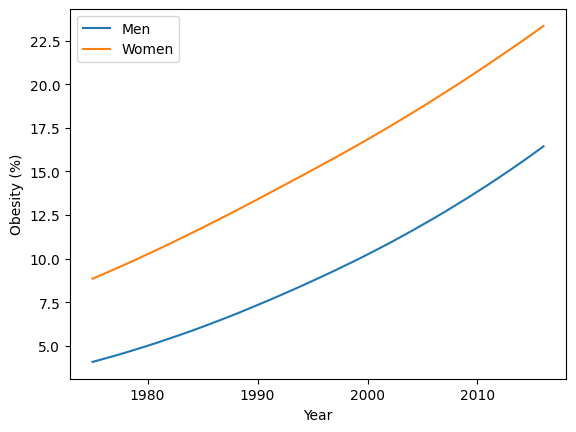

In [13]:
df_males_world = df_obesity[df_obesity['Sex'] == 'Male']
df_females_world = df_obesity[df_obesity['Sex'] == 'Female']

df_world = pd.merge(df_males_world, df_females_world, how='inner', on='Year')
df_world = df_world.rename(columns={'Obesity (%)_x': 'Obesity Males (%)', 'Obesity (%)_y': 'Obesity Females (%)'})
df_world.drop(['Country_x', 'Country_y', 'Sex_x', 'Sex_y'], axis=1, inplace=True)
df_world = df_world.groupby('Year').mean()
df_world.reset_index(inplace=True)
display(df_world)

plt.plot(df_world['Year'], df_world['Obesity Males (%)'], label='Men')
plt.plot(df_world['Year'], df_world['Obesity Females (%)'], label='Women')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Obesity (%)')

plt.show()


